In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.ndimage import convolve

plt.rcParams['image.interpolation'] = 'none'

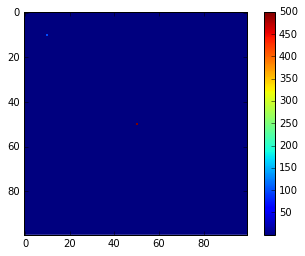

In [12]:
# define raw array

raw_data = np.random.rand(100,100)

# adding gamma peaks

raw_data[50,50] = 500
raw_data[10,10] = 100

plt.imshow(raw_data)
plt.colorbar()

In [23]:
def gamma_filtering(data, threshold=0.1):
    
    raw_data = np.copy(data)
    
    # find mean counts
    mean_counts = np.mean(raw_data)
    
    thresolded_raw_data = raw_data * threshold
    
    # get pixels where value is above threshold
    position = []
    [height, width] = np.shape(raw_data)
    for _x in np.arange(width):
        for _y in np.arange(height):
            if thresolded_raw_data[_y, _x] > mean_counts:
                position.append([_y, _x])
                
    # convolve entire image using 3x3 kerne
    mean_kernel = np.array([[1,1,1], [1,0,1], [1,1,1]]) / 8.0
    convolved_data = convolve(raw_data, mean_kernel, mode='constant')
    
    # replace only pixel above threshold by convolved data
    for _coordinates in position:
        [_y, _x] = _coordinates
        raw_data[_y, _x] = convolved_data[_y, _x]
        
    return raw_data
    

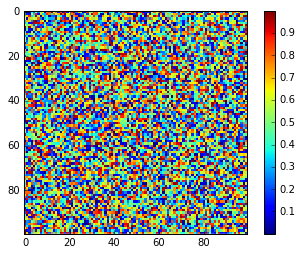

In [24]:
new_raw_data = gamma_filtering(raw_data)

plt.imshow(new_raw_data)
plt.colorbar()